In [15]:
%matplotlib inline

import keras

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam,SGD
import tensorflow as tf

from keras import backend as k
import h5py
import matplotlib.pyplot as plt
import numpy as np
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import math
from keras.callbacks import ModelCheckpoint


from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import numpy as np
import warnings

from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation,Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.regularizers import l2
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs
from keras.layers import Input, Lambda, Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Reshape, Concatenate

In [16]:
import numpy as np 
import cv2

In [17]:
def identity_block(input_tensor, kernel_size, filters, stage, block,same=None):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    
    filters1, filters2, filters3 = filters
    filters1=int(filters1/2)
    filters2=int(filters2/2)
    filters3=int(filters3/2)
    
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    if same:
      x=Conv2D(filters1, (1, 1), name=conv_name_base + '2a',padding='same')(input_tensor)
      print('same')
    else:
      x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [18]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2),same=None):
    """conv_block is the block that has a conv layer at shortcut
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    filters1=int(filters1/2)
    filters2=int(filters2/2)
    filters3=int(filters3/2)
    
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    if same:
      strides=(1,1)
      x = Conv2D(filters1, (1, 1), strides=strides,name=conv_name_base + '2a',padding='same')(input_tensor)
      print('same')
    else:
      x = Conv2D(filters1, (1, 1), strides=strides,name=conv_name_base + '2a')(input_tensor)
    
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [39]:
def ResNet50(input_tensor=None,
             input_shape=None,
             pooling=None,
             dropout=0.3
             ):
        # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=100,
                                      min_size=20,
                                      data_format=K.image_data_format(),
                                      require_flatten=False
                                      )
   
## NO of filters in original resnet/2 are used per layer, it is implimented in idenetity block


 #-----------------------------------





#----------------------------------------

    if input_tensor is None:
        img_input = Input(shape=(100,100,3))
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
        

    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    
    x = Dropout(dropout)(x)
   
    x1 = identity_block(x, 3, [64, 64, 256], stage='2', block='c')



    x1 = conv_block(x1, 3, [256, 256, 1024], stage='4', block='a')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [256, 256, 1024], stage='4', block='b')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [256, 256, 1024], stage='4', block='c')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [256, 256, 1024], stage='4', block='d')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [256, 256, 1024], stage='4', block='e')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [256, 256, 1024], stage='4', block='f')

    x1 = conv_block(x1, 3, [512, 512, 2048], stage='5', block='a')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [512, 512, 2048], stage='5', block='b')
    x1 = Dropout(dropout)(x1)
    x1 = identity_block(x1, 3, [512, 512, 2048], stage='5', block='c')
    ########

    
    x1=Conv2D(512, (3, 3), strides=(1,1),name='dimreduct_layers_1')(x1)
    x1 = BatchNormalization(axis=bn_axis, name='dimreduct_layers_bn_1')(x1)
    x1=Conv2D(512, (3, 3), strides=(1,1),name='dimreduct_layers_2')(x1)
    x1 = Dropout(dropout)(x1)
    x1 = BatchNormalization(axis=bn_axis, name='dimreduct_layers_bn_2')(x1)
    x1 = Dropout(dropout)(x1)
    x1=Flatten()(x1)
    x1 = Dense(1024,activation='relu')(x1)
    x1 = Dropout(dropout)(x1)
    x1= Dense(512,activation='relu')(x1)
    x1 = Dropout(dropout)(x1)
    x1=Dense(136,activation='relu')(x1)
    x1=Reshape((2, 68))(x1)


    
    
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(img_input,name='resnet50',outputs=[x1])


    return model

In [116]:
model=ResNet50(dropout=0.5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_17 (ZeroPadding2 (None, 106, 106, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [117]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [118]:
x_train=np.load('../300 wild face annotations/x_keypoints_train.npy')
y_train=np.load('../300 wild face annotations/y_keypoints_train.npy')
x_test=np.load('../300 wild face annotations/x_keypoints_test.npy')
y_test=np.load('../300 wild face annotations/y_keypoints_test.npy')
x_train=x_train/255.
x_test=x_test/255.

In [119]:
x_train.shape

(2313, 100, 100, 3)

In [120]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [121]:
filepath="./checkpoint/weights-6-8-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [122]:
def step_decay(epoch):
   initial_lrate = 0.001
   drop = 0.1
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

In [123]:
callbacks_list = [checkpoint, lrate]

In [124]:
import keras.backend as K
def custom_loss(y_true, y_pred):
    x0=y_true[0]
    y0=y_true[1]
    x1=y_pred[0]
    y1=y_pred[1]
    
    x_dist=x0-x1
    y_dist=y0-y1
    
    
    xsq=K.square(x_dist)
    ysq=K.square(y_dist)
    
    dist=xsq+ysq
    dist=K.sqrt(dist)
    
    return K.sum(dist)


In [141]:
model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics=['accuracy'])

In [142]:
keras.backend.get_session().run(tf.global_variables_initializer())
model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                    steps_per_epoch=len(x_train) / 16, epochs=100,callbacks=callbacks_list,
                    validation_data=(x_test, y_test))

Epoch 1/100
145/144 [==============================] - 43s 300ms/step - loss: 382.4734 - acc: 0.1497 - val_loss: 646.3372 - val_acc: 0.5999

Epoch 00001: val_acc did not improve
Epoch 2/100
145/144 [==============================] - 16s 113ms/step - loss: 205.3351 - acc: 0.2042 - val_loss: 165.5138 - val_acc: 0.3826

Epoch 00002: val_acc did not improve
Epoch 3/100
145/144 [==============================] - 16s 113ms/step - loss: 195.1165 - acc: 0.2262 - val_loss: 169.5838 - val_acc: 0.5999

Epoch 00003: val_acc did not improve
Epoch 4/100
145/144 [==============================] - 16s 113ms/step - loss: 191.6192 - acc: 0.2437 - val_loss: 155.7940 - val_acc: 0.5999

Epoch 00004: val_acc did not improve
Epoch 5/100
145/144 [==============================] - 16s 114ms/step - loss: 181.0844 - acc: 0.2620 - val_loss: 115.6513 - val_acc: 0.1563

Epoch 00005: val_acc did not improve
Epoch 6/100
145/144 [==============================] - 17s 118ms/step - loss: 183.3242 - acc: 0.2798 - val_los

KeyboardInterrupt: 

In [164]:
img=x_test[300]
img= np.expand_dims(img, axis=0)
pred=model.predict(img)

In [165]:
pred

array([[[30.121807, 30.558943, 31.462008, 32.48106 , 34.310135,
         37.83513 , 41.787586, 46.273933, 50.709347, 55.902   ,
         60.1221  , 63.57831 , 66.82961 , 68.7941  , 70.0467  ,
         70.4472  , 70.73255 , 33.59337 , 35.99744 , 39.788044,
         43.395355, 46.88508 , 53.23488 , 56.93455 , 59.822807,
         64.20534 , 66.6999  , 50.077045, 50.173996, 50.69415 ,
         50.491474, 46.094482, 48.87115 , 49.992443, 52.80491 ,
         54.47297 , 37.741253, 40.16694 , 42.721573, 45.143078,
         42.188496, 39.93139 , 54.93832 , 58.026783, 60.374794,
         62.476517, 60.43773 , 58.025814, 42.81162 , 45.73986 ,
         48.717205, 49.968468, 52.245052, 55.70865 , 58.044334,
         55.31178 , 52.702465, 50.301846, 48.95752 , 45.46054 ,
         43.580776, 48.408566, 50.588314, 52.529427, 56.9904  ,
         52.497883, 50.407265, 48.461052],
        [39.78002 , 44.61565 , 50.244076, 55.22145 , 60.155273,
         65.03806 , 67.95244 , 71.007385, 71.71529 , 70.30348

In [166]:
y_test[2]

array([[34.00646884, 33.62291638, 33.60106922, 34.54521061, 36.13469947,
        38.85031948, 42.9142135 , 47.26394208, 51.68949393, 55.45260455,
        58.57826937, 61.54199583, 63.67991077, 65.15023275, 66.18445451,
        66.99706854, 67.392642  , 38.29868529, 41.22372851, 45.42892214,
        49.51170713, 52.82682024, 56.56684602, 59.41454162, 62.55858673,
        65.30420303, 66.67199742, 54.21553192, 54.0444655 , 53.95470667,
        53.8189997 , 49.59102077, 51.2536696 , 53.05910819, 54.51996217,
        55.87218196, 42.60308764, 45.22895337, 47.28561008, 49.02269894,
        47.12722161, 45.10416732, 57.14410083, 59.3436185 , 61.04470826,
        62.9270119 , 60.95420614, 59.26284587, 43.90065125, 47.11994049,
        50.30962684, 52.39450781, 54.80437286, 57.14636042, 58.75721001,
        56.77926156, 54.55835193, 51.71298886, 49.5569213 , 46.44834784,
        44.78400068, 50.12519212, 52.22961099, 54.76843783, 57.8078066 ,
        54.58549651, 51.88999901, 49.81031289],
   

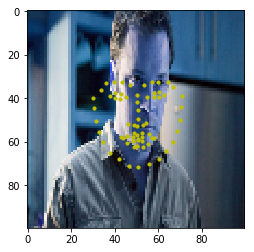

In [168]:
import matplotlib.pyplot as plt
plt.scatter(x=pred[0][0], y=pred[0][1], c='y', s=10)
plt.imshow(x_test[300])
plt.show()


In [77]:
img.shape

(1, 100, 100, 3)

In [111]:
model.load_weights('./checkpoint/weights-6-8-02-0.35.hdf5')